In [1]:
# Importações
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Lendo arquivo CSV
dataset = pd.read_csv("ArtilheirosModelo.csv", sep=",")

# Removendo espaços extras nas colunas e substituindo vírgulas por pontos nos valores numéricos
dataset.columns = dataset.columns.str.strip()
dataset = dataset.replace({',': '.', '%': ''}, regex=True)

# Convertendo colunas numéricas para float
for coluna in dataset.columns[1:]:
    dataset[coluna] = pd.to_numeric(dataset[coluna], errors='coerce')

# Removendo linhas com valores NaN (caso existam)
dataset = dataset.dropna()

# Separando variáveis independentes (X) e dependente (y)
X = dataset.iloc[:, 1:-1].values  # Todas as colunas menos a última (Gols)
y = dataset.iloc[:, -1].values    # Última coluna (Gols)


In [3]:
# Divisão da base de dados entre treinamento e teste (80% treino, 20% teste)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizando os dados (padronização - média 0 e desvio padrão 1)
scaler = StandardScaler()
X_treinamento = scaler.fit_transform(X_treinamento)
X_teste = scaler.transform(X_teste)


In [4]:
# Inicializando o modelo de regressão linear
modelo = LinearRegression()

# Treinando o modelo com os dados de treinamento
modelo.fit(X_treinamento, y_treinamento)

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_teste)


In [5]:
# Avaliando o desempenho do modelo
mse = mean_squared_error(y_teste, y_pred)
r2 = r2_score(y_teste, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Erro Quadrático Médio (MSE): 0.46
Coeficiente de Determinação (R²): 0.90


In [6]:
print(f"Score no treino: {modelo.score(X_treinamento, y_treinamento):.2f}")
print(f"Score no teste: {modelo.score(X_teste, y_teste):.2f}")


Score no treino: 0.98
Score no teste: 0.90


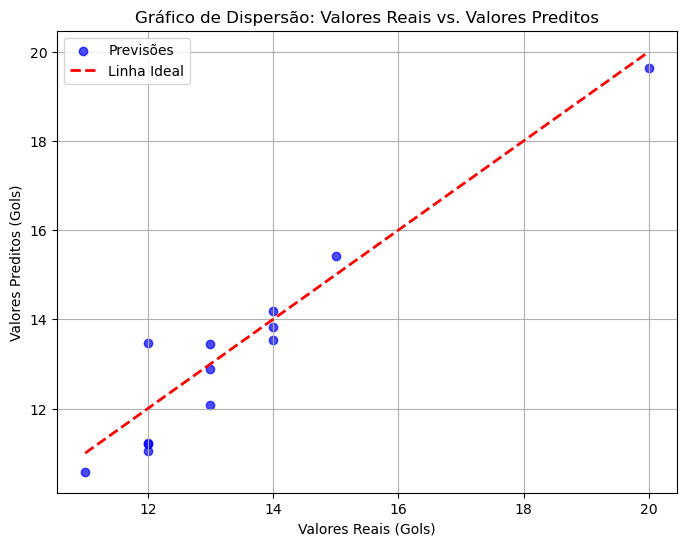

In [7]:
import matplotlib.pyplot as plt

# Supondo que `y_teste` são os valores reais e `y_pred` são os valores previstos pelo modelo
plt.figure(figsize=(8, 6))
plt.scatter(y_teste, y_pred, alpha=0.7, color='blue', label='Previsões')
plt.plot([min(y_teste), max(y_teste)], [min(y_teste), max(y_teste)], color='red', linestyle='--', linewidth=2, label='Linha Ideal')
plt.title('Gráfico de Dispersão: Valores Reais vs. Valores Preditos')
plt.xlabel('Valores Reais (Gols)')
plt.ylabel('Valores Preditos (Gols)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# Carregar o dataset Artilheiros2025
dataset_2025 = pd.read_csv("Artilheiros2025.csv", sep=",")

# Pré-processamento do dataset Artilheiros2025
dataset_2025.columns = dataset_2025.columns.str.strip()
dataset_2025 = dataset_2025.replace({',': '.', '%': ''}, regex=True)
for coluna in dataset_2025.columns[1:]:
    dataset_2025[coluna] = pd.to_numeric(dataset_2025[coluna], errors='coerce')

# Localizar os dados de German vegetti na tabela Artilheiros2025
vegetti = dataset_2025[dataset_2025['Atleta'] == 'P.Vegetti']

# Extrair as colunas de features para German vegetti
colunas_features = dataset.columns[1:-1]
X_vegetti = vegetti[colunas_features].values.reshape(1, -1)

# Normalizar os dados de German vegetti usando o mesmo scaler
X_vegetti_normalizado = scaler.transform(X_vegetti)

# Fazer a previsão para German vegetti
previsao_vegetti = modelo.predict(X_vegetti_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para  vegetti: {previsao_vegetti:.2f}")


Previsão de gols para  vegetti: 21.55


In [9]:
# Localizar os dados de G. Arrascaeta na tabela Artilheiros2025
Arrascaeta = dataset_2025[dataset_2025['Atleta'] == 'G. Arrascaeta']

# Extrair as colunas de features para Igor Jesus
X_Arrascaeta = Arrascaeta[colunas_features].values.reshape(1, -1)

# Normalizar os dados de Igor Jesus usando o mesmo scaler
X_Arrascaeta_normalizado = scaler.transform(X_Arrascaeta)

# Fazer a previsão para Igor Jesus
previsao_Arrascaeta = modelo.predict(X_Arrascaeta_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para G. Arrascaeta: {previsao_Arrascaeta:.2f}")


Previsão de gols para G. Arrascaeta: 16.88


In [10]:
# Localizar os dados de Arthur Cabral na tabela Artilheiros2025
Arthur_Cabral = dataset_2025[dataset_2025['Atleta'] == 'Arthur Cabral']

# Extrair as colunas de features para Arthur Cabral
X_Arthur_Cabral = Arthur_Cabral[colunas_features].values.reshape(1, -1)

# Normalizar os dados de Igor Jesus usando o mesmo scaler
X_Arthur_Cabral_normalizado = scaler.transform(X_Arthur_Cabral)

# Fazer a previsão para Igor Jesus
previsao_Arthur_Cabral = modelo.predict(X_Arthur_Cabral_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Arthur Cabral: {previsao_Arthur_Cabral:.2f}")


Previsão de gols para Arthur Cabral: 4.11


In [11]:
# Localizar os dados de Hulk na tabela Artilheiros2025
Hulk = dataset_2025[dataset_2025['Atleta'] == 'Hulk']

# Extrair as colunas de features para Hulk
X_Hulk = Hulk[colunas_features].values.reshape(1, -1)

# Normalizar os dados de Hulk usando o mesmo scaler
X_Hulk_normalizado = scaler.transform(X_Hulk)

# Fazer a previsão para Hulk
previsao_Hulk = modelo.predict(X_Hulk_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Hulk: {previsao_Hulk:.2f}")


Previsão de gols para Hulk: 6.21


In [12]:
# Localizar os dados de German Cano na tabela Artilheiros2025
German_Cano = dataset_2025[dataset_2025['Atleta'] =='German Cano']

# Extrair as colunas de features para German Cano
X_German_Cano = German_Cano[colunas_features].values.reshape(1, -1)

# Normalizar os dados de German Cano usando o mesmo scaler
X_German_Cano_normalizado = scaler.transform(X_German_Cano)

# Fazer a previsão para German Cano
previsao_German_Cano = modelo.predict(X_German_Cano_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para German Cano: {previsao_German_Cano:.2f}")


Previsão de gols para German Cano: 5.97


In [13]:
# Localizar os dados de Guilherme na tabela Artilheiros2025
Barreal = dataset_2025[dataset_2025['Atleta'] =='Barreal']

# Extrair as colunas de features para Guilherme
X_Barreal = Barreal[colunas_features].values.reshape(1, -1)

# Normalizar os dados de Guilherme usando o mesmo scaler
X_Barreal_normalizado = scaler.transform(X_Barreal)

# Fazer a previsão para Guilherme
previsao_Barreal = modelo.predict(X_Barreal_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Barreal: {previsao_Barreal:.2f}")


Previsão de gols para Barreal: 5.99


In [14]:
# Localizar os dados de Yuri Alberto na tabela Artilheiros2025
Yuri_Alberto = dataset_2025[dataset_2025['Atleta'] =='Yuri Alberto']

# Extrair as colunas de features para Yuri Alberto
X_yuri_Alberto = Yuri_Alberto[colunas_features].values.reshape(1, -1)

# Normalizar os dados de Yuri Alberto usando o mesmo scaler
X_yuri_Alberto_normalizado = scaler.transform(X_yuri_Alberto)

# Fazer a previsão para Yuri Alberto
previsao_yuri_Alberto = modelo.predict(X_yuri_Alberto_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Yuri Alberto: {previsao_yuri_Alberto:.2f}")


Previsão de gols para Yuri Alberto: 2.97


In [15]:
# Localizar os dados de José López na tabela Artilheiros2025
Jose_Lopez = dataset_2025[dataset_2025['Atleta'] =='José López']

# Extrair as colunas de features para José López
X_Jose_Lopez = Jose_Lopez[colunas_features].values.reshape(1, -1)

# Normalizar os dados de José López usando o mesmo scaler
X_Jose_Lopez_normalizado = scaler.transform(X_Jose_Lopez)

# Fazer a previsão para José López
previsao_Jose_Lopez = modelo.predict(X_Jose_Lopez_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para José López: {previsao_Jose_Lopez:.2f}")


Previsão de gols para José López: 3.41


In [16]:
# Localizar os dados de André Silva na tabela Artilheiros2025
Andre_Silva = dataset_2025[dataset_2025['Atleta'] =='André Silva']

# Extrair as colunas de features para Yuri Alberto
X_andre_Silva = Andre_Silva [colunas_features].values.reshape(1, -1)

# Normalizar os dados de André Silva usando o mesmo scaler
X_andre_Silva_normalizado = scaler.transform(X_andre_Silva)

# Fazer a previsão para André Silva
previsao_andre_Silva = modelo.predict(X_andre_Silva_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para André Silva: {previsao_andre_Silva:.2f}")


Previsão de gols para André Silva: 7.01


In [17]:
# Localizar os dados de Kaio Jorge na tabela Artilheiros2025
Kaio_Jorge = dataset_2025[dataset_2025['Atleta'] =='Kaio Jorge']

# Extrair as colunas de features para Kaio Jorge
X_Kaio_Jorge = Kaio_Jorge [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Kaio Jorge usando o mesmo scaler
X_Kaio_Jorge_normalizado = scaler.transform(X_Kaio_Jorge)

# Fazer a previsão para Kaio Jorge
previsao_Kaio_Jorge = modelo.predict(X_Kaio_Jorge_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Kaio Jorge: {previsao_Kaio_Jorge:.2f}")


Previsão de gols para Kaio Jorge: 21.52


In [18]:
# Localizar os dados de Alan Patrick na tabela Artilheiros2025
Alan_Patrick = dataset_2025[dataset_2025['Atleta'] =='Alan Patrick']

# Extrair as colunas de features para Alan Patrick
X_Alan_Patrick = Alan_Patrick [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Alan Patrick usando o mesmo scaler
X_Alan_Patrick_normalizado = scaler.transform(X_Alan_Patrick)

# Fazer a previsão para Alan Patrick
previsao_Alan_Patrick = modelo.predict(X_Alan_Patrick_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Alan Patrick: {previsao_Alan_Patrick:.2f}")


Previsão de gols para Alan Patrick: 6.57


In [19]:
# Localizar os dados de Brainthwhite na tabela Artilheiros2025
Brainthwhite = dataset_2025[dataset_2025['Atleta'] =='Brainthwhite']

# Extrair as colunas de features para Yuri Alberto
X_Brainthwhite = Brainthwhite [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Yuri Alberto usando o mesmo scaler
X_Brainthwhite_normalizado = scaler.transform(X_Brainthwhite)

# Fazer a previsão para Yuri Alberto
previsao_Brainthwhite = modelo.predict(X_Brainthwhite_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Brainthwhite: {previsao_Brainthwhite:.2f}")

Previsão de gols para Brainthwhite: 10.62


In [20]:
# Localizar os dados de Renato Kayzer na tabela Artilheiros2025
Renato_Kayzer = dataset_2025[dataset_2025['Atleta'] =='Renato Kayzer']

# Extrair as colunas de features para Renato Kayzer
X_Renato_Kayzer = Renato_Kayzer [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Renato Kayzer usando o mesmo scaler
X_Renato_Kayzer_normalizado = scaler.transform(X_Renato_Kayzer)

# Fazer a previsão para Renato Kayzer
previsao_Renato_Kayzer = modelo.predict(X_Renato_Kayzer_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Renato Kayzer: {previsao_Renato_Kayzer:.2f}")

Previsão de gols para Renato Kayzer: 9.93


In [21]:
# Localizar os dados de Luciano Juba na tabela Artilheiros2025
Luciano_Juba = dataset_2025[dataset_2025['Atleta'] =='Luciano Juba']

# Extrair as colunas de features para Luciano Juba
X_Luciano_Juba = Luciano_Juba [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Luciano Juba usando o mesmo scaler
X_Luciano_Juba_normalizado = scaler.transform(X_Luciano_Juba)

# Fazer a previsão para Luciano Juba
previsao_Luciano_Juba = modelo.predict(X_Luciano_Juba_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Luciano Juba: {previsao_Luciano_Juba:.2f}")

Previsão de gols para Luciano Juba: 12.54


In [22]:
# Localizar os dados de Pedro Raul na tabela Artilheiros2025
Pedro_Raul = dataset_2025[dataset_2025['Atleta'] =='Pedro Raul']

# Extrair as colunas de features para Pedro Raul
X_Pedro_Raul = Pedro_Raul [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Pedro Raul usando o mesmo scaler
X_Pedro_Raul_normalizado = scaler.transform(X_Pedro_Raul)

# Fazer a previsão para Pedro Raul
previsao_Pedro_Raul = modelo.predict(X_Pedro_Raul_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Pedro Raul: {previsao_Pedro_Raul:.2f}")

Previsão de gols para Pedro Raul: 14.03


In [23]:

# Localizar os dados de J.M. Lucero na tabela Artilheiros2025
J_M_Lucero = dataset_2025[dataset_2025['Atleta'] =='J.M. Lucero']

# Extrair as colunas de features para J.M. Lucero
X_J_M_Lucero = J_M_Lucero [colunas_features].values.reshape(1, -1)

# Normalizar os dados de J.M. Lucero usando o mesmo scaler
X_J_M_Lucero_normalizado = scaler.transform(X_J_M_Lucero)

# Fazer a previsão para J.M. Lucero
previsao_J_M_Lucero = modelo.predict(X_J_M_Lucero_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para J.M. Lucero: {previsao_J_M_Lucero:.2f}")

Previsão de gols para J.M. Lucero: 2.88


In [24]:

# Localizar os dados de Barletta na tabela Artilheiros2025
Barletta = dataset_2025[dataset_2025['Atleta'] =='Barletta']

# Extrair as colunas de features para Barletta
X_Barletta = Barletta [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Yuri Alberto usando o mesmo scaler
X_Barletta_normalizado = scaler.transform(X_Barletta)

# Fazer a previsão para Yuri Alberto
previsao_Barletta = modelo.predict(X_Barletta_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Barletta: {previsao_Barletta:.2f}")

Previsão de gols para Barletta: 2.14


In [25]:

# Localizar os dados de Reinaldo na tabela Artilheiros2025
Reinaldo = dataset_2025[dataset_2025['Atleta'] =='Reinaldo']

# Extrair as colunas de features para Yuri Alberto
X_Reinaldo = Reinaldo [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Yuri Alberto usando o mesmo scaler
X_Reinaldo_normalizado = scaler.transform(X_Reinaldo)

# Fazer a previsão para Yuri Alberto
previsao_Reinaldo = modelo.predict(X_Reinaldo_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Reinaldo: {previsao_Reinaldo:.2f}")

Previsão de gols para Reinaldo: 14.19


In [26]:

# Localizar os dados de Isidro Pitta na tabela Artilheiros2025
Isidro_Pitta = dataset_2025[dataset_2025['Atleta'] =='Isidro Pitta']

# Extrair as colunas de features para Isidro Pitta
X_Isidro_Pitta = Isidro_Pitta [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Isidro Pitta usando o mesmo scaler
X_Isidro_Pitta_normalizado = scaler.transform(X_Isidro_Pitta)

# Fazer a previsão para Isidro Pitta
previsao_Isidro_Pitta = modelo.predict(X_Isidro_Pitta_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para Isidro Pitta: {previsao_Isidro_Pitta:.2f}")

Previsão de gols para Isidro Pitta: 0.38


In [27]:

# Localizar os dados de Yuri Alberto na tabela Artilheiros2025
G_Tailari = dataset_2025[dataset_2025['Atleta'] =='G.Tailari']

# Extrair as colunas de features para Yuri Alberto
X_G_Tailari = G_Tailari [colunas_features].values.reshape(1, -1)

# Normalizar os dados de Yuri Alberto usando o mesmo scaler
X_G_Tailari_normalizado = scaler.transform(X_G_Tailari)

# Fazer a previsão para Yuri Alberto
previsao_G_Tailari = modelo.predict(X_G_Tailari_normalizado)[0]

# Imprimir o resultado
print(f"Previsão de gols para G.Tailari: {previsao_G_Tailari:.2f}")

Previsão de gols para G.Tailari: 2.29


C:\Users\henriquebspc\AppData\Local\Temp\ipykernel_41160\3818958249.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Ano", y="Minutos", data=df_minutos, palette=["blue", "red"])


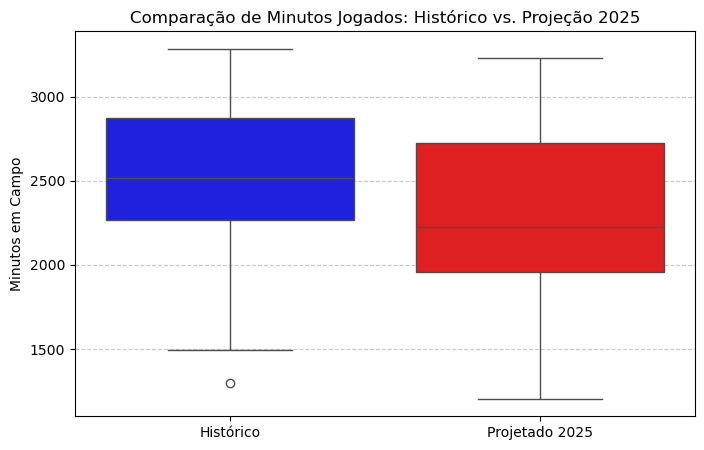

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os arquivos CSV
dataset_modelo = pd.read_csv("ArtilheirosModelo.csv", sep=",")
dataset_2025 = pd.read_csv("Artilheiros2025.csv", sep=",")

# Removendo espaços extras nos nomes das colunas
dataset_modelo.columns = dataset_modelo.columns.str.strip()
dataset_2025.columns = dataset_2025.columns.str.strip()

# Convertendo a coluna "Minutos" para float (corrigindo vírgulas)
dataset_modelo["Minutos"] = dataset_modelo["Minutos"].astype(str).str.replace(",", ".").astype(float)
dataset_2025["Minutos"] = dataset_2025["Minutos"].astype(str).str.replace(",", ".").astype(float)

# Criando um DataFrame para o boxplot
df_minutos = pd.DataFrame({
    "Ano": ["Histórico"] * len(dataset_modelo["Minutos"]) + ["Projetado 2025"] * len(dataset_2025["Minutos"]),
    "Minutos": dataset_modelo["Minutos"].tolist() + dataset_2025["Minutos"].tolist()
})

# Criando o Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x="Ano", y="Minutos", data=df_minutos, palette=["blue", "red"])
plt.title("Comparação de Minutos Jogados: Histórico vs. Projeção 2025")
plt.ylabel("Minutos em Campo")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


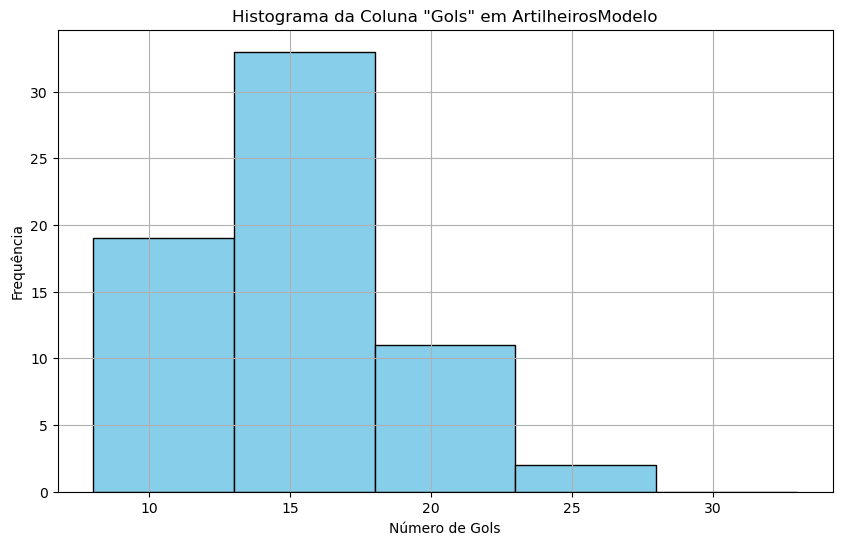

KeyError: 'Gols'

<Figure size 1000x600 with 0 Axes>

In [29]:
# Pré-processamento do dataset Artilheiros2025
dataset_2025.columns = dataset_2025.columns.str.strip()
dataset_2025 = dataset_2025.replace({',': '.', '%': ''}, regex=True)
for coluna in dataset_2025.columns[1:]:
    dataset_2025[coluna] = pd.to_numeric(dataset_2025[coluna], errors='coerce')
dataset_2025 = dataset_2025.dropna()
# Definir os limites e intervalos do histograma
min_value = 8
max_value = 32
bins = range(int(min_value), int(max_value) + 5, 5)
# Criar o histograma para ArtilheirosModelo
plt.figure(figsize=(10, 6))
plt.hist(dataset['Gols'], bins, color='skyblue', edgecolor='black')
plt.title('Histograma da Coluna "Gols" em ArtilheirosModelo')
plt.xlabel('Número de Gols')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

 #Criar o histograma para Artilheiros2025
plt.figure(figsize=(10, 6))
plt.hist(dataset_2025['Gols'], bins, color='lightcoral', edgecolor='black')
plt.title('Histograma da Coluna "Gols" em Artilheiros2025')
plt.xlabel('Número de Gols')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Ordenar os dados por número de gols em ordem decrescente
dataset_ordenado = dataset_2025.sort_values(by='Gols previstos', ascending=False)

# Identificar os 5 maiores valores
top_5_indices = dataset_ordenado.head(5).index

# Criar o gráfico de barras
plt.figure(figsize=(14, 7))
bar_colors = ['skyblue' if i not in top_5_indices else 'orange' for i in dataset_ordenado.index]  # Define cores diferentes para os top 5
plt.bar(dataset_ordenado['Atleta'], dataset_ordenado['Gols previstos'], color=bar_colors)
plt.title('Número de Gols por Atleta (Destaque para os Top 5)')
plt.xlabel('Atleta')
plt.ylabel('Número de Gols')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

KeyError: 'Gols previstos'